In [10]:
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'

# Problem Parameters
a = 0.
b = 1.


def exact(*x):
    return np.prod(np.sin(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2) * exact(*x)


def g(*x):
    return np.zeros_like(x[0])

In [11]:
# Parameters
d = 2
k = 2
Ns = np.arange(4, 15, 1, dtype=int)

# Computed Parameters
ranges = ((a, b),) * d

Lidx = lambda cs: np.all([np.logical_and(c != a, c != b) for c in cs], axis=0)
Bidx = lambda cs: np.any([np.logical_or(c == a, c == b) for c in cs], axis=0)

L = lambda func: lambda *x: - func.laplacian(*x)
B = lambda func: lambda *x: func(*x)

# Integration
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Data collection
results = np.zeros((np.size(Ns), 3))

for i, N in enumerate(Ns):
    xc = rad.gridn(ranges, N, flat=True)

    # Solve for approximate solution
    delta = 4 / N
    phi = rad.Wendland(d, k, delta, xc)
    solver = rad.solve.CollocationSolver(phi, L, Lidx, B, Bidx)
    approx = solver.solve(f, g)
    error = rad.error(exact, approx, error_integrator)
    cond = solver.cond()
    bw = np.max(solver.bandwidth())
    
    results[i,0] = error 
    results[i, 1] = cond
    results[i, 2] = bw
    
    print("N:", N)
    print("  L2 Error:", error)
    print("  Condition Number:", cond)
    print("  Bandwidth:", bw)

N: 4
  L2 Error: 1.1623696933671834
  Condition Number: 112.50179255262759
  Bandwidth: 10
N: 5
  L2 Error: 7.666048481777115
  Condition Number: 307.0337339895525
  Bandwidth: 16
N: 6
  L2 Error: 1.1899771318486276
  Condition Number: 3097.524581142773
  Bandwidth: 19
N: 7
  L2 Error: 2.4889451515935437
  Condition Number: 889.9923532469022
  Bandwidth: 22
N: 8
  L2 Error: 1.3211129376390913
  Condition Number: 2859.167087348694
  Bandwidth: 25
N: 9
  L2 Error: 2.8417406987972713
  Condition Number: 13384.187385185158
  Bandwidth: 28
N: 10
  L2 Error: 3.7047337780198895
  Condition Number: 1555.949012335547
  Bandwidth: 31
N: 11
  L2 Error: 8.137948644421133
  Condition Number: 8692.80756731591
  Bandwidth: 35
N: 12
  L2 Error: 5.272957038176394
  Condition Number: 8711.019964147808
  Bandwidth: 38
N: 13
  L2 Error: 2.910318519062605
  Condition Number: 159614.06514735246
  Bandwidth: 41
N: 14
  L2 Error: 2.642553020986974
  Condition Number: 193273.1421694586
  Bandwidth: 44


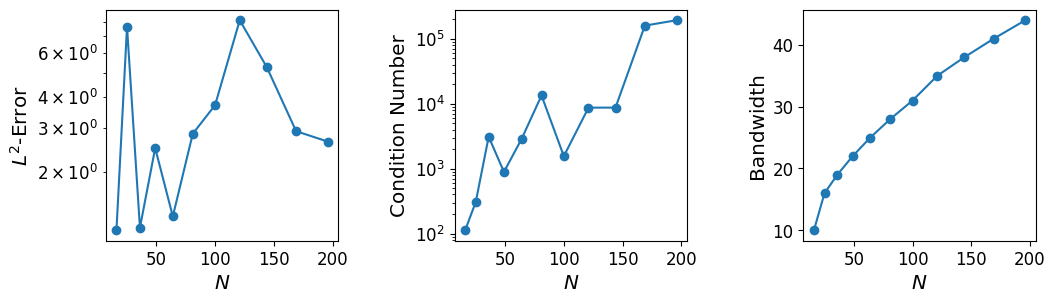

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))

axs[0].set_xlabel(r"$N$")
axs[0].set_ylabel(r"$L^{2}$-Error")
axs[0].set_yscale('log')
axs[0].plot(Ns ** d, results[:, 0], 'o-')

axs[1].set_xlabel(r"$N$")
axs[1].set_ylabel(r"Condition Number")
axs[1].set_yscale('log')
axs[1].plot(Ns ** d, results[:, 1], 'o-')

axs[2].set_xlabel(r"$N$")
axs[2].set_ylabel(r"Bandwidth")
axs[2].plot(Ns ** d, results[:, 2], 'o-')

plt.subplots_adjust(wspace=0.5)
plt.savefig("figures/kansa/ratio.pdf", bbox_inches='tight')

In [13]:
np.shape(results)[0]

11